In [ ]:
import numpy as np,pandas as pd, tensorflow as tf, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('/content/heart.csv')
data.head()

,age,sex,chol,trestbps,thalach,target
0,52,1,200,130,150,1
1,58,0,240,150,140,1
2,60,1,180,140,145,0
3,48,1,190,120,160,0
4,50,0,220,125,155,1


In [ ]:
x = data.drop('target',axis=1)
y = data['target']

In [ ]:
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8,activation='relu',input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(2,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')])

In [ ]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs=100,verbose=0, validation_data=(x_test, y_test))

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[[0.53871304]
 [0.6781718 ]
 [0.5258667 ]
 [0.5368476 ]
 [0.56638503]
 [0.47578654]
 [0.47578654]
 [0.47578654]]


In [ ]:
loss, accuracy = model.evaluate(x_test,y_test)
print(f"loss:{loss:.2f} and accuracy:{accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7500 - loss: 0.6427
loss:0.64 and accuracy:0.75


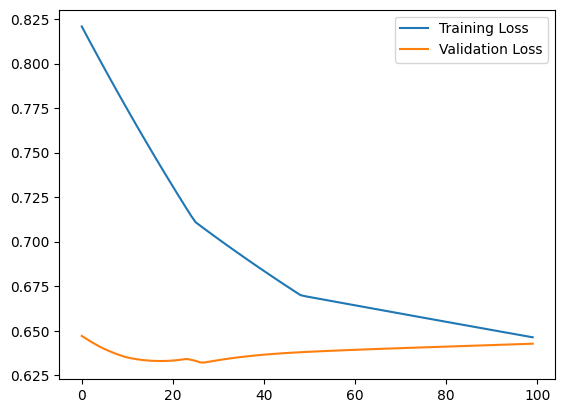

In [ ]:
plt.plot(history.history ["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()